In [111]:
#For data Manipulation
import numpy as np
import pandas as pd
#In order to show all columns available
pd.set_option('display.max_columns', 200)

#Sklearn imports
from sklearn.preprocessing import LabelEncoder

#file system management
import os

#Graphing libs
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
#listing directory, viewing files available
print(os.listdir("./Dataset"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


# Exploratory Data Analysis

In order to find out what our data can tell us, we should explore the features and dimensions of our data. The main source of data for our dataset here will be located in the 'application_train.csv' file. So we load the data into pandas in order to organize and see our fields

In [113]:
#Create dataframe called apptrain (for applicant train)
apptrain = pd.read_csv('./Dataset/application_train.csv')
apptest = pd.read_csv('./Dataset/application_test.csv')
apptrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [114]:
print(apptest.shape)
apptest

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

# Find missing data
First things first, let's go through our data and find out if there are columns missing data, and find out how to clean them. This is also helpful in finding out which features will have not a lot of weight in helping our model learn.

In [115]:
# missing value check
def check_missing_value(df):
    # Returns how many values are missing in each column
    missing_values = df.isnull().sum()
    # Percentage
    missing_values_percent = 100 * missing_values / len(df)
    # Table
    missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
    # renaming columns
    missing_value_table_renamed_columns = missing_values_table.rename( columns={0: 'Missing values', 1: '% of total values'})
    # return summary info
    return missing_value_table_renamed_columns

In [116]:
# Using previously defined function to create a new df to inspect columns
expl_missing_values_df = check_missing_value(apptrain)

In [117]:
mvdf = expl_missing_values_df.loc[~(expl_missing_values_df==0).all(axis=1)]
mvdf.sort_values(by=['% of total values'], ascending=False).head(30)

,Missing values,% of total values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


# Let's hit the Target column
Considering that we're giving the outcome in our training data but not our test data, let's see what the distribution looks like. Here we will put up a simple matplotlib graph to show the distribution of those who demonstrate high ability and those who don't

In [118]:
apptrain['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

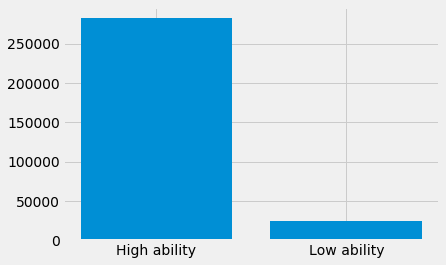

In [119]:
fig, ax = plt.subplots()
x = np.arange(2)
plt.bar(x, [apptrain['TARGET'].value_counts()[0], apptrain['TARGET'].value_counts()[1]])
plt.xticks(x, ('High ability', 'Low ability'))
plt.show()

# Number of Unique categories in categorical features
To find out how many unique entries there are in the categorical columns we can use the following line of code. This is helpful for one-hot encoding should we choose this feature

In [120]:
apptrain.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# One-Hot Encoding, Label-Encoding, and PCA (Principal Component Analysis)
For now, we will use label-encoding for categorical columns which ontain only two distinct values (binary). and we will use one-hot enoding for all other columns. One-hot encoding will be one hell of an explosion for the column ORGANIZATION TYPE, due to the large amount of distinct variables

In [121]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through columns
for col in apptrain:
    if apptrain[col].dtype == "object":
        if len(list(apptrain[col].unique())) <= 2:
            #train on the training data
            le.fit(apptrain[col])
            #transform both training and testing data
            apptrain[col] = le.transform(apptrain[col])
            apptest[col] = le.transform(apptest[col])
            
            le_count += 1
            

print('{} columns were label encoded'.format(le_count))

3 columns were label encoded


In [122]:
#One-Hot encoding
apptrain = pd.get_dummies(apptrain)
apptest = pd.get_dummies(apptest)

print('Training features shape: {}'.format(apptrain.shape))
print('Training features shape: {}'.format(apptest.shape))

Training features shape: (307511, 243)
Training features shape: (48744, 239)


In [123]:
train_labels = apptrain['TARGET']

#aligning the training and testing data, keep only columns present in both df's
apptrain, apptest = apptrain.align(apptest, join = 'inner', axis = 1)
apptrain['TARGET'] = train_labels

print('Training Features shape: ', apptrain.shape)
print('Testing features shape: ', apptest.shape)

Training Features shape:  (307511, 240)
Testing features shape:  (48744, 239)


In [104]:
(apptrain['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [105]:
apptrain['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

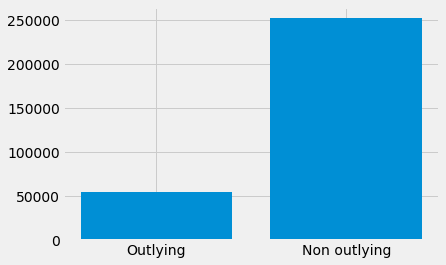

In [106]:
# Seems as if our data has an error, Some people have been employed for 100+ years,
fig1, ax1 = plt.subplots()
x = np.arange(2)
plt.bar(x, [apptrain[apptrain['DAYS_EMPLOYED'] == 365243].count()[0], apptrain[apptrain['DAYS_EMPLOYED'] != 365243].count()[0] ])
plt.xticks(x, ['Outlying', 'Non outlying'])
plt.show()

In [107]:
#So we know we have approximately 5000 entries with anomalous data 

In [108]:
de_anomalous = apptrain[apptrain['DAYS_EMPLOYED'] == 365243]
de_non_anomalous = apptrain[apptrain['DAYS_EMPLOYED'] != 365243]

print('Non-anomalous dataset defaults on {}%'.format(100*de_non_anomalous['TARGET'].mean()))
print('Anomalous dataset defaults on {}%'.format(100*de_anomalous['TARGET'].mean()))

KeyError: 'TARGET'

In [ ]:
apptrain['DAYS_EMPLOYED_ANOM'] = apptrain['DAYS_EMPLOYED'] == 365243
apptrain['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
apptrain['DAYS_EMPLOYED'].plot.hist(title="Days employment Histogram")
plt.xlabel('Days Employment')

In [ ]:
# Very important to migrate changes over to our test data as well.
apptest['DAYS_EMPLOYED_ANOM'] = apptest['DAYS_EMPLOYED'] == 365243
apptest['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
print('There are {} anomalies in the test data out of {} entries'.format(apptest['DAYS_EMPLOYED_ANOM'].sum(), len(apptest)))

# Correlations
It's time to explore correlations between our many features and the target (what we're aiming to predict)

In [ ]:
correlations = apptrain.corr()['TARGET'].sort_values()
print('Top 15 positive correlations', correlations.tail(15))
print('Top 15 negative correlations', correlations.head(15))

In [ ]:
apptrain['DAYS_BIRTH'] = abs(apptrain['DAYS_BIRTH'])
apptrain['DAYS_BIRTH'].corr(apptrain['TARGET'])

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(apptrain['DAYS_BIRTH']/365, bins=50, edgecolor='y')
plt.title('Age of Client')
plt.xlabel('Age(years)')
plt.ylabel('Count')

In [ ]:
plt.figure(figsize = (10, 8))
sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'TARGET == 0')
sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 1, 'DAYS_BIRTH'] / 365, LABEL = 'TARGET == 1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of ages')

In [ ]:
age_df = apptrain[['TARGET', 'DAYS_BIRTH']]
age_df['YEARS_BIRTH'] = age_df['DAYS_BIRTH'] / 365

age_df['YEARS_BINNED'] = pd.cut(age_df['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_df.head(15)

In [ ]:
age_groups = age_df.groupby('YEARS_BINNED').mean()
age_groups

In [ ]:
plt.figure(figsize = ( 20, 8))

plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.title('Failure to repay by binned age')

In [ ]:
#Looking deeper at the correlations with EXT data sources

In [ ]:
external_data = apptrain[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
external_data_correlation = external_data.corr()
external_data_correlation

In [ ]:
# Deploy correlation heatmap for easier view of tabular data
plt.figure(figsize = (8, 6))
sns.heatmap(external_data_correlation, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

In [ ]:
plt.figure(figsize = (15,12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # Create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 0, source], label = 'TARGET == 0')
    sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 1, source], label = 'TARGET == 1')
    
    plt.title('Distribution of {} by target value'.format(source))
    plt.xlabel('{}'.format(source))
    plt.ylabel('Density')

plt.tight_layout(h_pad = 2.5)

In [ ]:
#Creating polynomial features
poly_features = apptrain[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = apptest[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [ ]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

#Imputing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
#Create polynomial object with specific degree
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
#train the polynomial features
poly_transformer.fit(poly_features)

#transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial features shape: ', poly_features.shape)

In [ ]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

In [ ]:
# Create a dataframe with the newly created features
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add back the target
poly_features['TARGET'] = poly_target

#run correlations for new features
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

In [ ]:
#Create a dataframe with newly created features for test
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [ ]:
#Putting features into training dataframe
poly_features['SK_ID_CURR'] = apptrain['SK_ID_CURR']
apptrain_poly = apptrain.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

#Merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = apptest['SK_ID_CURR']
apptest_poly = apptest.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

#align DFs
apptrain_poly, apptest_poly = apptrain_poly.align(apptest_poly, join = 'inner', axis = 1)
print('training data with polynomial features shape: ', apptrain_poly.shape)
print('testing data with polynomial features shape: ', apptest_poly.shape)

In [ ]:
apptrain_domain = apptrain.copy()
apptest_domain = apptest.copy()

apptrain_domain['CREDIT_INCOME_PERCENT'] = apptrain_domain['AMT_CREDIT'] * 100 / apptrain_domain['AMT_INCOME_TOTAL']
apptrain_domain['ANNUITY_INCOME_PERCENT'] = apptrain_domain['AMT_ANNUITY'] / apptrain_domain['AMT_INCOME_TOTAL']
apptrain_domain['CREDIT_TERM'] = apptrain_domain['AMT_ANNUITY'] / apptrain_domain['AMT_CREDIT']
apptrain_domain['DAYS_EMPLOYED_PERCENT'] = apptrain_domain['DAYS_EMPLOYED'] / apptrain_domain['DAYS_BIRTH']

In [ ]:
apptest_domain['CREDIT_INCOME_PERCENT'] = apptest_domain['AMT_CREDIT'] / apptest_domain['AMT_INCOME_TOTAL']
apptest_domain['ANNUITY_INCOME_PERCENT'] = apptest_domain['AMT_ANNUITY'] / apptest_domain['AMT_INCOME_TOTAL']
apptest_domain['CREDIT_TERM'] = apptest_domain['AMT_ANNUITY'] / apptest_domain['AMT_CREDIT']
apptest_domain['DAYS_EMPLOYED_PERCENT'] = apptest_domain['DAYS_EMPLOYED'] / apptest_domain['DAYS_BIRTH']

In [ ]:
apptrain_domain[['CREDIT_INCOME_PERCENT', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'TARGET', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']]

In [124]:
from sklearn.preprocessing import MinMaxScaler, Imputer

if 'TARGET' in apptrain:
    train = apptrain.drop(columns = ['TARGET'])
else:
    train = apptrain.copy()


features = list(train.columns)

#copy test data
test = apptest.copy()

#median imputing of missing values
imputer = Imputer(strategy = 'median')

#scale each feature
scaler = MinMaxScaler(feature_range = (0,1))

#fitting on training data
imputer.fit(train)

#Transforming training and testing data
train = imputer.transform(train)
test = imputer.transform(apptest)

#Do so with scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data sape: ', train.shape)
print('testing data shape: ', test.shape)

Training data sape:  (307511, 239)
testing data shape:  (48744, 239)


In [128]:
from sklearn.linear_model import LogisticRegression

#Make model with regularization parameters
log_reg = LogisticRegression(C=0.0001)

#Train on training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [129]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [137]:
submit = apptest[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit

C:\Users\rGust\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.066737
1,100005,0.128240
2,100013,0.084269
3,100028,0.060365
4,100038,0.128022
5,100042,0.055187
6,100057,0.084225
7,100065,0.124466
8,100066,0.049683
9,100067,0.101718
